In [ ]:
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [10]:
file_path = "../data/BTCUSDT-binance-spot-1d.csv"
df = pd.read_csv(file_path)
df.head()

,timestamp,open,high,low,close,volume
0,2017-08-17,4261.48,4485.39,4200.74,4285.08,795.150377
1,2017-08-18,4285.08,4371.52,3938.77,4108.37,1199.888264
2,2017-08-19,4108.37,4184.69,3850.00,4139.98,381.309763
3,2017-08-20,4120.98,4211.08,4032.62,4086.29,467.083022
4,2017-08-21,4069.13,4119.62,3911.79,4016.00,691.743060


In [13]:
df.describe()

,open,high,low,close,volume
count,2783.000000,2783.000000,2783.000000,2783.000000,2783.000000
mean,29126.076101,29818.035602,28379.252619,29154.086820,66825.282084
std,24673.445255,25191.557459,24119.866955,24689.349345,79210.865993
min,3188.010000,3276.500000,2817.000000,3189.020000,228.108068
25%,8695.420000,8904.160000,8403.950000,8700.855000,27562.526052
50%,21195.600000,21684.870000,20736.720000,21237.690000,43000.432560
75%,43685.535000,44377.260000,42557.730000,43707.880000,70098.076238
max,106143.820000,109588.000000,105321.490000,106143.820000,760705.362783


In [ ]:
# Check if any NaN exists
has_nan = df.isna().any().any()
print("Does the DataFrame contain any NaN?:", has_nan)

Does the DataFrame contain any NaN?: False


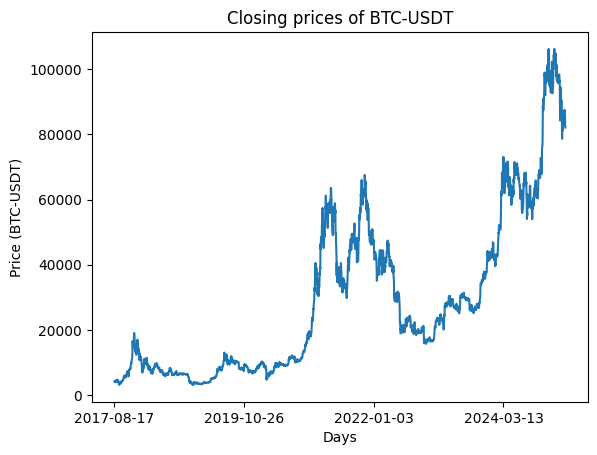

In [ ]:
plt.plot(df['timestamp'],df['close'])
plt.xlabel('Days')
plt.ylabel('Price (BTC-USDT)')
plt.title('Closing prices of BTC-USDT')

# Reduce the number of ticks
from matplotlib.ticker import MaxNLocator
plt.gca().xaxis.set_major_locator(MaxNLocator(nbins=5))  # Show ~5 ticks

Text(0.5, 1.0, 'Distribution of Log Returns (Closing Price) with KDE')

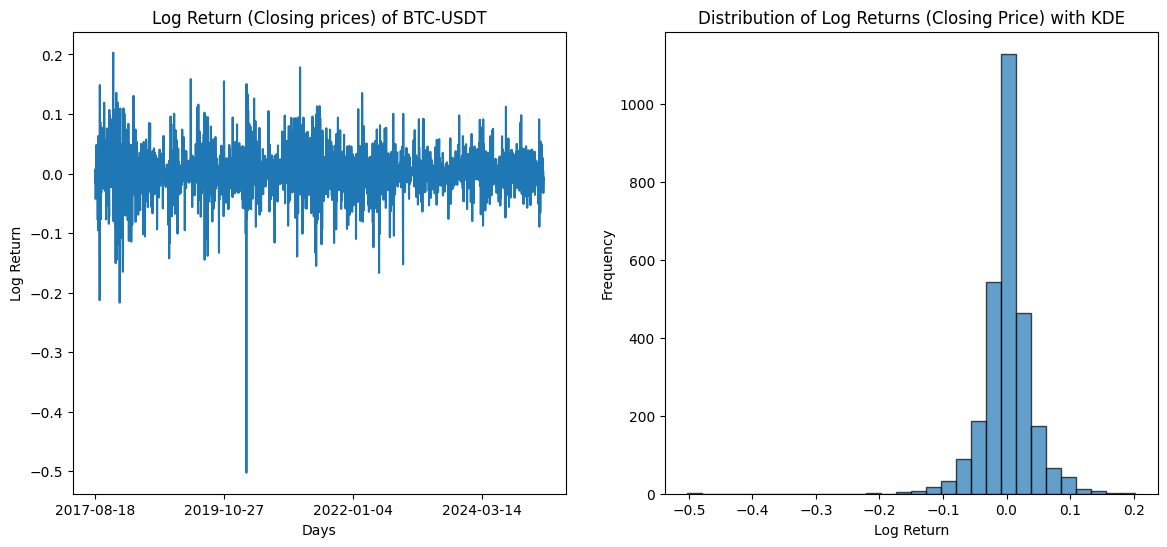

In [52]:
df['log return'] = np.log(df['close'] / df['close'].shift(1))
df_logreturn = df.dropna()

fig, axs = plt.subplots(1,2,figsize=(14, 6))
axs[0].plot(df_logreturn['timestamp'],df_logreturn['log return'])

axs[0].set_xlabel('Days')
axs[0].set_ylabel('Log Return')
axs[0].set_title('Log Return (Closing prices) of BTC-USDT')
axs[0].xaxis.set_major_locator(MaxNLocator(nbins=5))  # Show ~5 ticks

# Plot histogram with KDE
axs[1].hist(df_logreturn['log return'], bins=30, edgecolor='black', alpha=0.7)

# Add labels and title
axs[1].set_xlabel('Log Return')
axs[1].set_ylabel('Frequency')
axs[1].set_title('Distribution of Log Returns (Closing Price) with KDE')

In [66]:
df_logreturn.sort_values('log return').head()

,timestamp,open,high,low,close,volume,log return
938,2020-03-12,7934.58,7966.17,4410.00,4800.00,261505.608653,-0.502607
152,2018-01-16,13500.00,13542.93,9035.00,10900.00,63401.169175,-0.216880
28,2017-09-14,3944.00,3993.00,3165.13,3189.02,1665.021543,-0.212657
1761,2022-06-13,26574.53,26895.84,21925.77,22487.41,254611.034966,-0.166998
172,2018-02-05,8179.99,8382.80,6625.00,6939.99,63403.182579,-0.164980


In [ ]:
df_logreturn[df_logreturn['timestamp'] == "2020-03-11"]

,timestamp,open,high,low,close,volume,log return
939,2020-03-13,4800.01,5955.0,3782.13,5578.6,402201.673764,0.150322


In [76]:
df_logreturn[df_logreturn['timestamp'] == "2020-03-13"]

,timestamp,open,high,low,close,volume,log return
939,2020-03-13,4800.01,5955.0,3782.13,5578.6,402201.673764,0.150322


In [88]:
df_logreturn[df_logreturn['timestamp'] == "2017-09-13"]

,timestamp,open,high,low,close,volume,log return
27,2017-09-13,4159.72,4165.38,3760.0,3944.69,913.462545,-0.054039


In [89]:
df_logreturn[df_logreturn['timestamp'] == "2017-09-15"]

,timestamp,open,high,low,close,volume,log return
29,2017-09-15,3188.01,3856.0,2817.0,3700.0,1968.866492,0.148619
